# Inference and action example

This notebook demonstrates basic inference and action selection for a given generative model.  It does not consider learning, multiple factors, multiple modalities. Moreover, actions are only selected based on _extrinsic_ value, ignoring uncertainty resolution.

The notebook considers a simple `grid_world` environment with 3 x 3 states. The agent can peform one of 5 actions at each time step: `LEFT, RIGHT, UP, DOWN, STAY`. It must infer its position from observations about its location, and navigate to its preferred location. 


## Add `inferactively` module

In [1]:
import os
import sys
from pathlib import Path
path = Path(os.getcwd())
module_path = str(path.parent.parent) + '/'
sys.path.append(module_path)

## Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from grid_world import GridWorldEnv
from inferactively import Categorical, softmax

## Plotting

In [30]:
def plot_beliefs(Qs):
    values = Qs.values[:, 0]
    plt.grid(zorder=0)
    plt.bar(range(Qs.shape[0]), values, c='r', zorder=3)
    plt.xticks(range(Qs.shape[0]))
    plt.title("Beliefs over state (Qs)")
    plt.show()

## Environment

In [33]:
REWARD_LOCATION = 7
env = GridWorldEnv()
env.set_reward_state(REWARD_LOCATION)

## Generative model

In [4]:
likelihood_matrix = env.get_likelihood_matrix()
A = Categorical(values=likelihood_matrix)

transition_matrix = env.get_transition_matrix()
B = Categorical(values=transition_matrix)

## Beliefs

In [5]:
Qs = Categorical(dims=[env.n_states])

## Prior preferences

In [34]:
C = Categorical(dims=[env.n_states])
C[REWARD_LOCATION] = 1.

## Infer inital state

Inital state: `8`


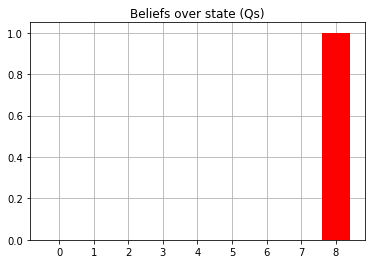

In [37]:
o = env.reset()
Qs = softmax(A[o, :].log())
print("Inital state: `{}`".format(env.s))
plot_beliefs(Qs)

## Inference loop

True state: `5`


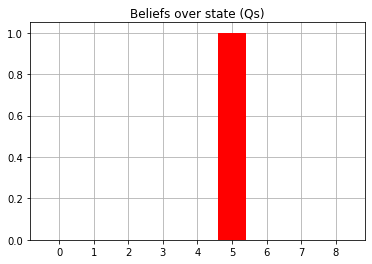

True state: `4`


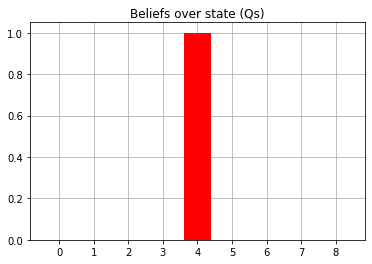

True state: `5`


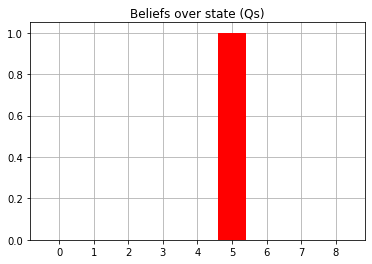

True state: `5`


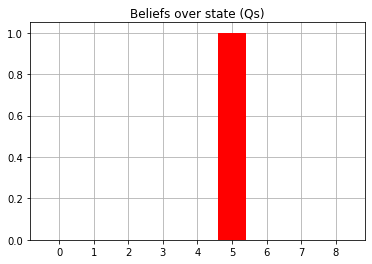

True state: `2`


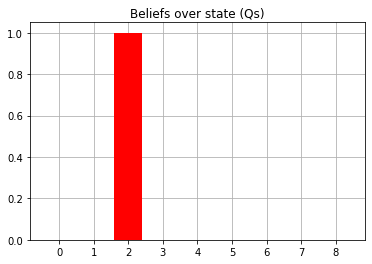

True state: `1`


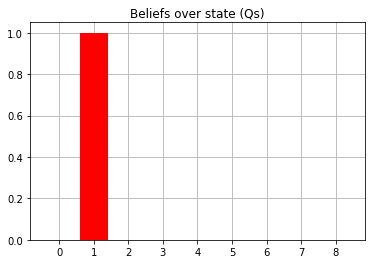

True state: `1`


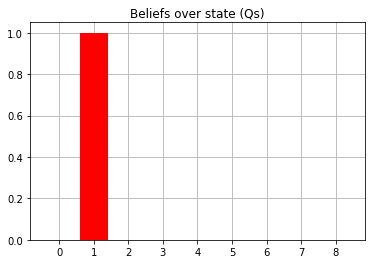

True state: `2`


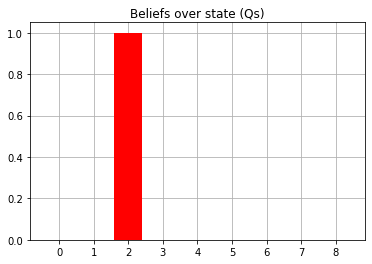

True state: `5`


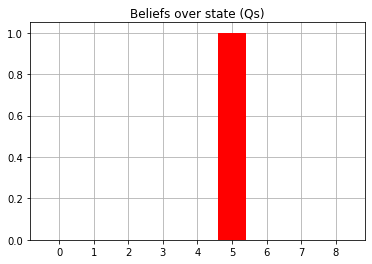

True state: `8`


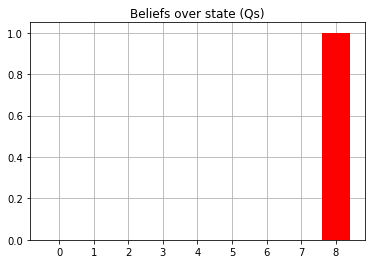

In [43]:
T = 10
for t in range(T):
    a = np.random.randint(env.n_actions)
    o, r = env.step(a)
    Qs = softmax(A[o,:].log() + B[a].dot(Qs).log())
    print("True state: `{}`".format(env.s))
    plot_beliefs(Qs)